NAME - HIBAH MOHAMMED GHOUSE

Z-ID - Z1945894

In [12]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from itertools import product

### 1. Pick a graph from ​http://www.tylervigen.com/spurious-correlations​ and recreate it using matplotlib (you can also use numpy and pandas). You can generate the data manually by looking at the points. Ensure the axes are labeled properly. 

In [2]:
#Creating dataframes using pandas

data = {'years':[1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
        'soldcars':[758, 863,837, 930, 830 , 810, 921, 1154, 1183, 1142, 829],
        'suicidecrashing': [87, 103, 91, 112, 104, 108, 113, 137, 131, 129, 104]}

df = pd.DataFrame(data)

In [3]:
def smoothenXY(x, y) :
    x_new = np.linspace(x.min(), x.max(), 500)

    rbf = Rbf(x, y, function = 'thin_plate', smooth = 0.001)
    y_smooth = rbf(x_new)
    return x_new, y_smooth

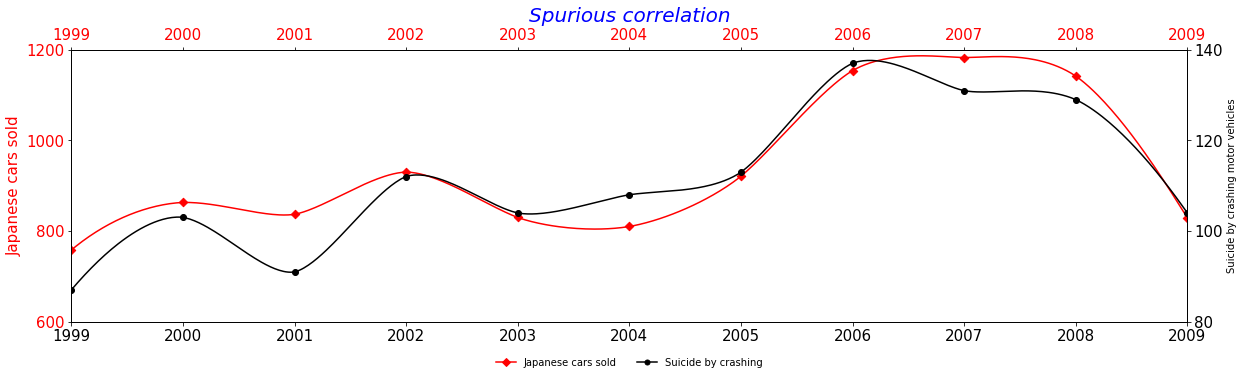

In [4]:
#Plotting the visual representation of spurious correlation for japanese car sold, years and suicide by crashing motor vehicles
x = df.years;
y1 = df.soldcars;
y2 = df.suicidecrashing;


red="red"
black="black"

newX, newY1 = smoothenXY(x, y1)
newX, newY2 = smoothenXY(x, y2)

plt.rcParams["figure.figsize"] = (20,5)

plt.title("Spurious correlation", fontsize=20, color='blue',
          fontstyle='italic')

ax1 = plt.gca()
ax1.set_ylim([600, 1200])
ax1.set_xlim([1999, 2009])
ax1.set_xticks(df['years'])
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15, labelcolor=red)
ax1.set_yticks([600,800, 1000, 1200])
ax1.set_ylabel("Japanese cars sold", color=red, fontsize=15)
carsSold, = ax1.plot(newX, newY1, color=red)
ax1.scatter(x, y1, color=red, marker='D')

ax2 = ax1.twinx()
ax2.set_ylim([80, 140])
ax2.set_yticks([80,100, 120, 140])
ax2.tick_params(axis="y", labelsize=15)
ax2.set_ylabel("Suicide by crashing motor vehicles", color=black, fontsize=15)
suicides, = ax2.plot(newX, newY2, color=black)
ax2.scatter(x, y2, color=black, marker='o')

ax2.yaxis.label.set_size(10)

ax3= ax1.twiny()
ax3.set_xlim([1999, 2009])
ax3.set_xticks(df['years'])
ax3.tick_params(axis="x", labelsize=15, labelcolor=red)

red_line = mlines.Line2D([], [], color='red', marker='D',markersize=5, label='Japanese cars sold')

black_line = mlines.Line2D([], [], color='black', marker='o', markersize=5, label='Suicide by crashing')

ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=False, shadow=True, ncol=5, frameon = False, handles=[red_line, black_line])


plt.show()

### 2. Create a pair-plot of the iris dataset similar to the below one using only numpy and matplotlib (you can use Scikit-learn to load the data with Sklearn.datasets.load_iris, you are not allowed to use pandas or seaborn). Ensure all axes are labeled. The		 diagonals need to contain histograms, the different species need to be distinguished by color, and there needs to be a legend for the species. 

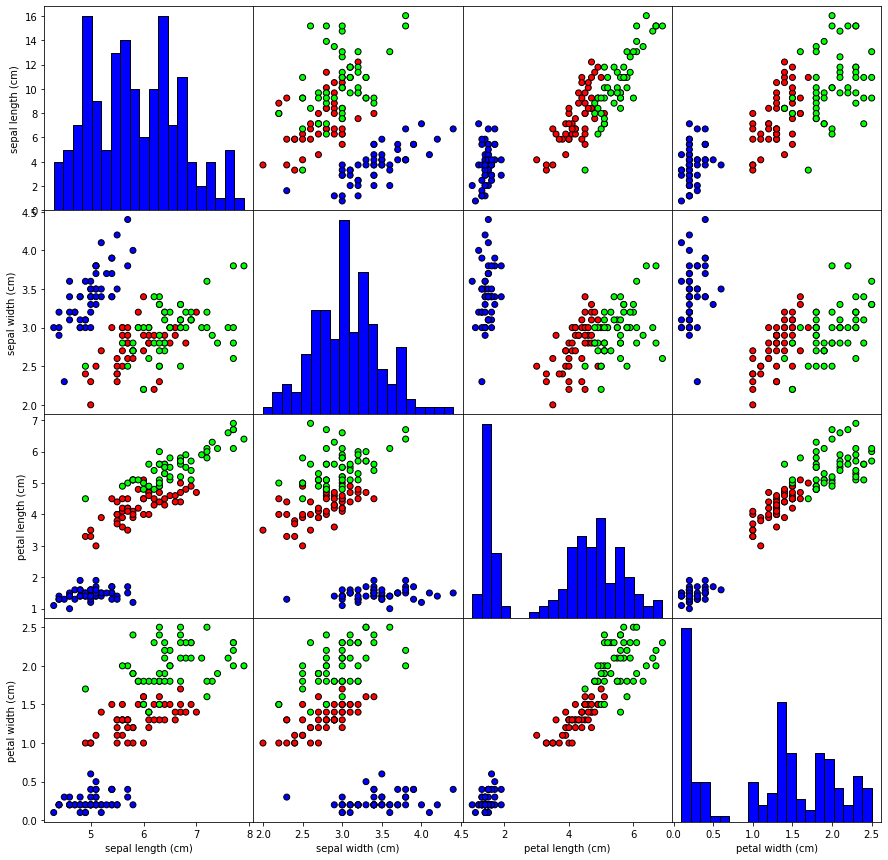

In [45]:
from sklearn.datasets import  load_iris

iris_data = load_iris()

x = iris_data.data
y = iris_data.target

sepallength = x[:,[0]]
sepalwidth = x[:,[1]]
petallength = x[:,[2]]
petalwidth = x[:,[3]]

data = [sepallength, sepalwidth, petallength, petalwidth]
numOfCols = len(data)

fig, ax = plt.subplots(numOfCols, numOfCols, figsize=(15, 15))

for i in range(0, numOfCols):
    for j in range(0,numOfCols):
        if i == j:
            ax[i, j].hist(x[:,[j]], bins = 20, color='blue', edgecolor='black')
            if not i==0:
              ax[i,j].axes.yaxis.set_visible(False)
            if not i==3:
              ax[i,j].axes.xaxis.set_visible(False)

        else:
            ax[i, j].scatter(data[j],data[i], c=y, cmap='brg', edgecolor='black')
            if not j==0:
              ax[i,j].axes.yaxis.set_visible(False)
            if not i==3:
              ax[i,j].axes.xaxis.set_visible(False)

ax[0, 0].set_ylabel('sepal length (cm)')
ax[1, 0].set_ylabel('sepal width (cm)')
ax[2, 0].set_ylabel('petal length (cm)')
ax[3, 0].set_ylabel('petal width (cm)')

ax[3, 0].set_xlabel('sepal length (cm)')
ax[3, 1].set_xlabel('sepal width (cm)')
ax[3, 2].set_xlabel('petal length (cm)')
ax[3, 3].set_xlabel('petal width (cm)')

plt.subplots_adjust(wspace=0, hspace=0)


###     3. Reproduce the graphs on overlapping data from “Fundamentals of Data Visualization” https://serialmentor.com/dataviz/overlapping-points.html​ that is figures 18.1 to 18.4, using matplotlib as subplots in a single figure. You can read the data from following link. Please use the weblink for reading the data, not the local path.
https://raw.githubusercontent.com/pratoolbharti/NIU/master/Applied_Machine_Learning_S20/Homework-1/mpg.csv

In [6]:
def rand_jitter(df, jitterCoeff):
    arr = df.to_numpy()
    stdev = jitterCoeff * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def ploltWithJitter(ax, x, y, jitter=0.01, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return ax.scatter(rand_jitter(x, jitter), rand_jitter(y, jitter), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)


In [7]:
def addLegend(scatterPlot, ax):
    legend = ax.legend(handles=scatterPlot.legend_elements(),loc="upper right", title="drive train")
    ax.add_artist(legend)

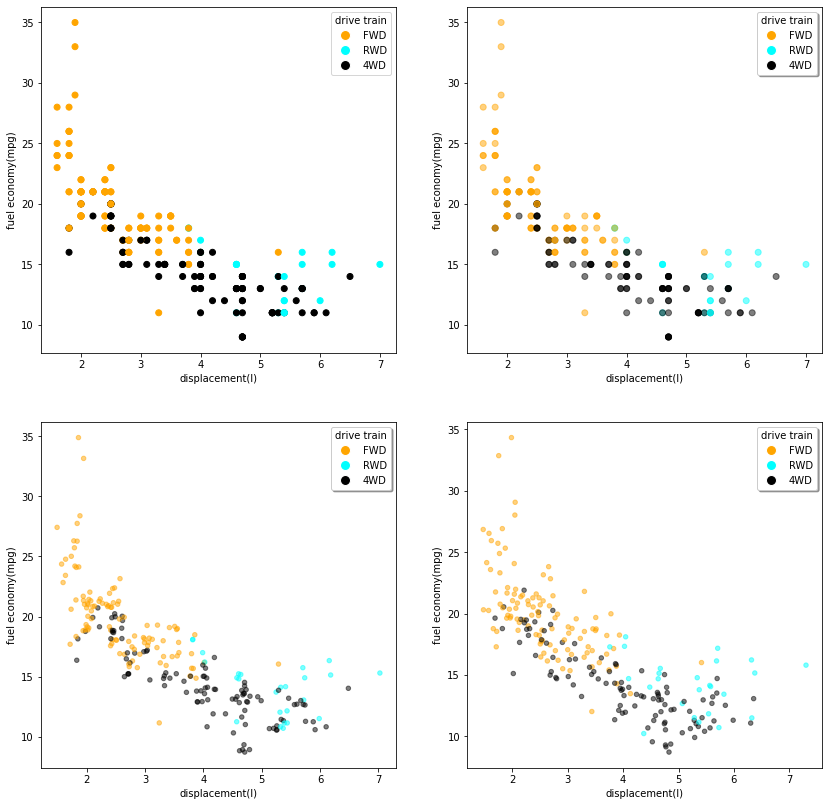

In [8]:
csvFileURL = "https://raw.githubusercontent.com/pratoolbharti/NIU/master/Applied_Machine_Learning_S20/Homework-1/mpg.csv"

df = pd.read_csv(csvFileURL)


fig, ax = plt.subplots(2, 2, figsize=(14, 14))


colors = {
    'f' : 'orange',
    'r' : 'cyan',
    '4' : 'black'
}

xLabel = "displacement(l)"
yLabel = "fuel economy(mpg)"
legend_elements = [Line2D([0], [0], marker='o', color='w', label='FWD',markerfacecolor=colors.get('f'), markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='RWD',markerfacecolor=colors.get('r'), markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='4WD',markerfacecolor=colors.get('4'), markersize=10)]

plot1 = ax[0, 0].scatter(df.displ, df.cty, c=df['drv'].map(colors))
ax[0, 0].legend(loc="upper right", title="drive train",handles = legend_elements)

plot2 = ax[0, 1].scatter(df.displ, df.cty, c=df['drv'].map(colors), alpha = 0.5)
ax[0, 1].legend(loc="upper right", title="drive train",handles = legend_elements, framealpha = None, shadow = True)

plot3 = ploltWithJitter(ax[1, 0], df.displ, df.cty, c=df['drv'].map(colors), alpha = 0.5)
ax[1,0].legend(loc="upper right", title="drive train",handles = legend_elements, framealpha = None, shadow = True)

plot4 = ploltWithJitter(ax[1, 1], df.displ, df.cty, c=df['drv'].map(colors), alpha = 0.5, jitter=0.03)
ax[1,1].legend(loc="upper right", title="drive train",handles = legend_elements, framealpha = None, shadow = True)

for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].set_xlabel(xLabel);
        ax[i, j].set_ylabel(yLabel);
plt.show()